In [1]:
import dotenv
dotenv.load_dotenv()

True

In [2]:
from satellite.request import reanalysis_era5_land

---

## `coper` extension basic usage

In [3]:
#ds = reanalysis_era5_land(locale="ARG", date="2024-10-19")
#ds

---

## Sandbox (TODO: REMOVE)

In [4]:
from satellite import ADM0, ADM1, ADM2, DataSet
import pandas as pd
import matplotlib.pyplot as plt
import rasterio

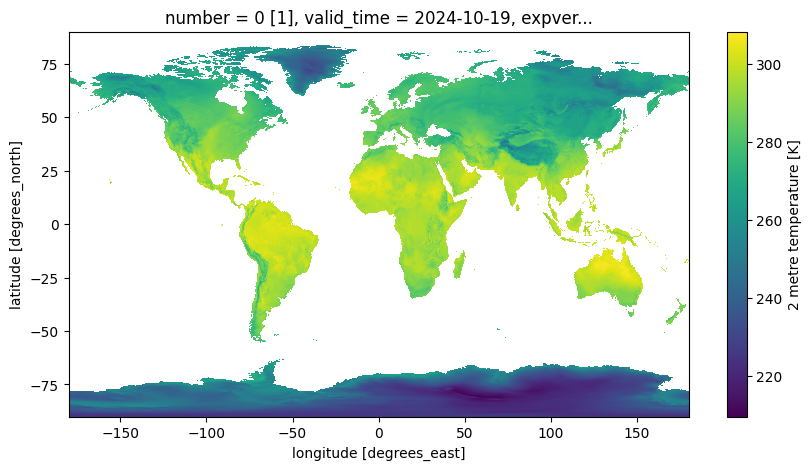

In [5]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19.zip") as ds:
    fig, ax = plt.subplots(figsize=(10, 5))
    img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

    plt.show()

In [6]:
#gdf = ADM0.get(code="ARG").to_dataframe()
gdf = pd.concat([adm.to_dataframe() for adm in ADM1.filter(adm0="ARG")]).reset_index(drop=True)
gdf

,code,name,adm0,geometry
0,02,Ciudad Autónoma de Buenos Aires,ARG,"POLYGON ((-58.42401 -34.66208, -58.42409 -34.6..."
1,10,Catamarca,ARG,"POLYGON ((-65.5949 -29.70813, -65.60121 -29.69..."
2,14,Córdoba,ARG,"POLYGON ((-63.39224 -34.52954, -63.39189 -34.5..."
3,18,Corrientes,ARG,"POLYGON ((-59.11069 -30.27619, -59.11073 -30.2..."
4,22,Chaco,ARG,"POLYGON ((-60.274 -28.00174, -60.33882 -28.001..."
5,30,Entre Ríos,ARG,"POLYGON ((-58.4597 -33.50864, -58.45823 -33.51..."
6,34,Formosa,ARG,"POLYGON ((-58.2186 -26.38936, -58.21913 -26.39..."
7,38,Jujuy,ARG,"POLYGON ((-65.35742 -24.46213, -65.35841 -24.4..."
8,42,La Pampa,ARG,"POLYGON ((-64.53681 -38.85812, -64.53761 -38.8..."
9,46,La Rioja,ARG,"POLYGON ((-67.55747 -30.43711, -67.57006 -30.4..."


<Axes: >

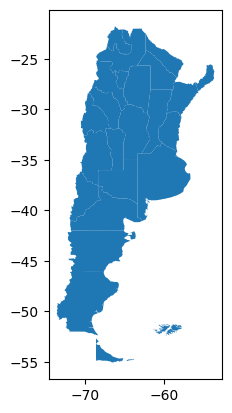

In [7]:
gdf.plot()

In [8]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19_ARG.nc") as ds:
    mask = rasterio.features.rasterize(
        [(geom, 1) for geom in gdf.geometry],
        out_shape=ds.rio.shape,
        transform=ds.rio.transform(),
        fill=0,
        dtype='uint8'
    )
    ds = ds.where(mask)

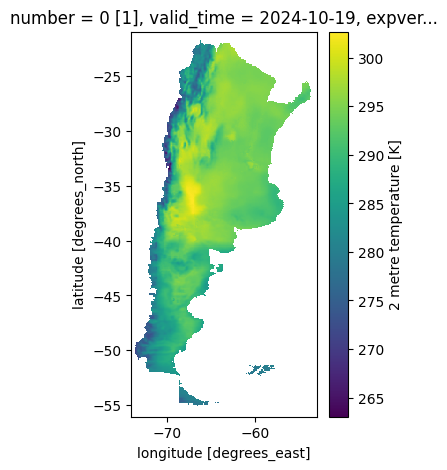

In [9]:
fig, ax = plt.subplots(figsize=(3, 5))
img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

plt.show()

<Axes: >

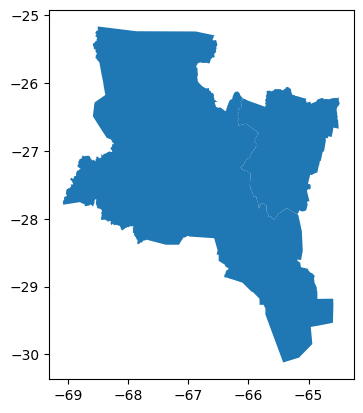

In [10]:
gdf = pd.concat([adm.to_dataframe() for adm in ADM1.filter(code=10)+ADM1.filter(code="90")]).reset_index(drop=True)
gdf.plot()

In [11]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19_ARG.nc") as ds:
    mask = rasterio.features.rasterize(
        [(geom, 1) for geom in gdf.geometry],
        out_shape=ds.rio.shape,
        transform=ds.rio.transform(),
        fill=0,
        dtype='uint8'
    )
    ds = ds.where(mask)

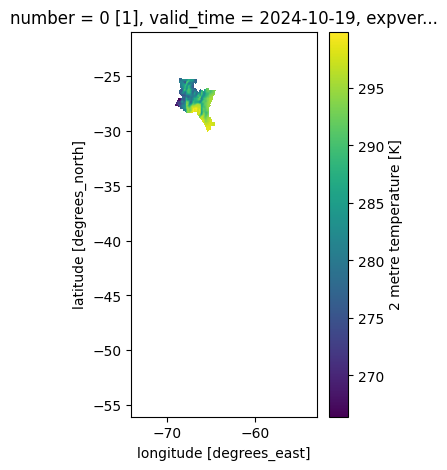

In [12]:
fig, ax = plt.subplots(figsize=(3, 5))
img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

plt.show()

In [13]:
gdf = ADM2.filter()[0].to_dataframe()

<Axes: >

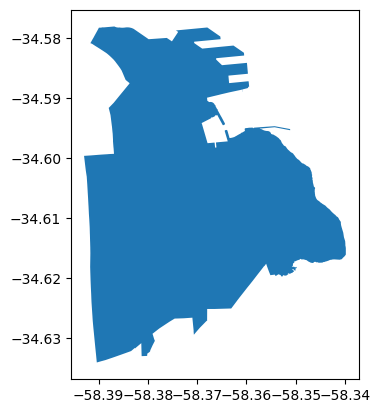

In [14]:
gdf.plot()

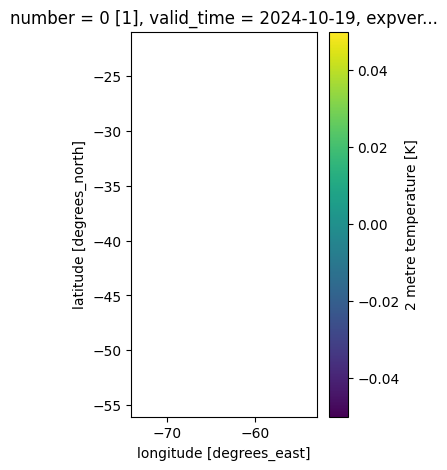

In [15]:
with DataSet.from_netcdf("reanalysis-era5-land_2024-10-19_ARG.nc") as ds:
    mask = rasterio.features.rasterize(
        [(geom, 1) for geom in gdf.geometry],
        out_shape=ds.rio.shape,
        transform=ds.rio.transform(),
        fill=0,
        dtype='uint8'
    )
    ds = ds.where(mask)
    fig, ax = plt.subplots(figsize=(3, 5))
    img = ds.t2m.isel(valid_time=0).plot(ax=ax, cmap='viridis')

    plt.show()

In [17]:
ds.where(~ds.t2m.isnull(), drop=True)

<xarray.Dataset> Size: 8B
Dimensions:     (valid_time: 0, latitude: 0, longitude: 0)
Coordinates:
    number      int64 8B 0
  * valid_time  (valid_time) datetime64[ns] 0B 
  * latitude    (latitude) float64 0B 
  * longitude   (longitude) float64 0B 
    expver      (valid_time) <U4 0B 
Data variables:
    t2m         (valid_time, latitude, longitude) float32 0B 
    tp          (valid_time, latitude, longitude) float32 0B 
    d2m         (valid_time, latitude, longitude) float32 0B 
    sp          (valid_time, latitude, longitude) float32 0B 
Attributes:
    GRIB_centre:             ecmf
    GRIB_centreDescription:  European Centre for Medium-Range Weather Forecasts
    GRIB_subCentre:          0
    Conventions:             CF-1.7
    institution:             European Centre for Medium-Range Weather Forecasts
    history:                 2024-10-25T14:50 GRIB to CDM+CF via cfgrib-0.9.1...